<h1 style='background:#CCE2CB; border:0; color:black'><center> Importing Libraries </center></h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

rcParams['figure.figsize'] = 15, 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style='background:#CCE2CB; border:0; color:black'><center> Loading Data </center></h1>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analytics Intern/Customertravel.csv')

<h1 style='background:#CCE2CB; border:0; color:black'><center> EDA </center></h1>

In [ ]:
df.sample(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
54,31,No,Middle Income,1,No,Yes,0
412,30,No,Low Income,4,Yes,No,0
784,34,No,Low Income,1,Yes,Yes,0
930,37,No,Middle Income,6,No,Yes,0
847,31,No,Low Income,2,Yes,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

Min Age : 27
Max Age : 38


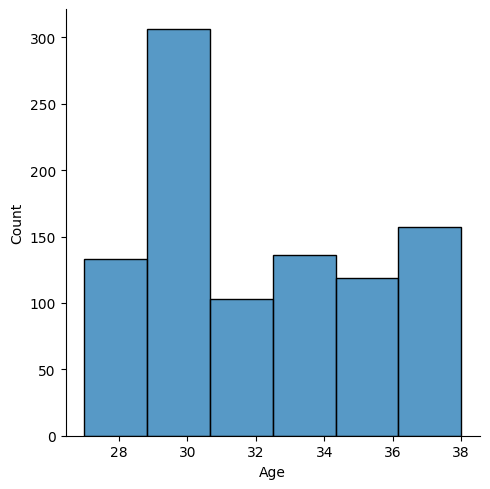

In [ ]:
print(f"Min Age : {min(df['Age'])}")
print(f"Max Age : {max(df['Age'])}")
sns.displot(data=df, x='Age', bins=6)

In [ ]:
catcol = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted','AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']

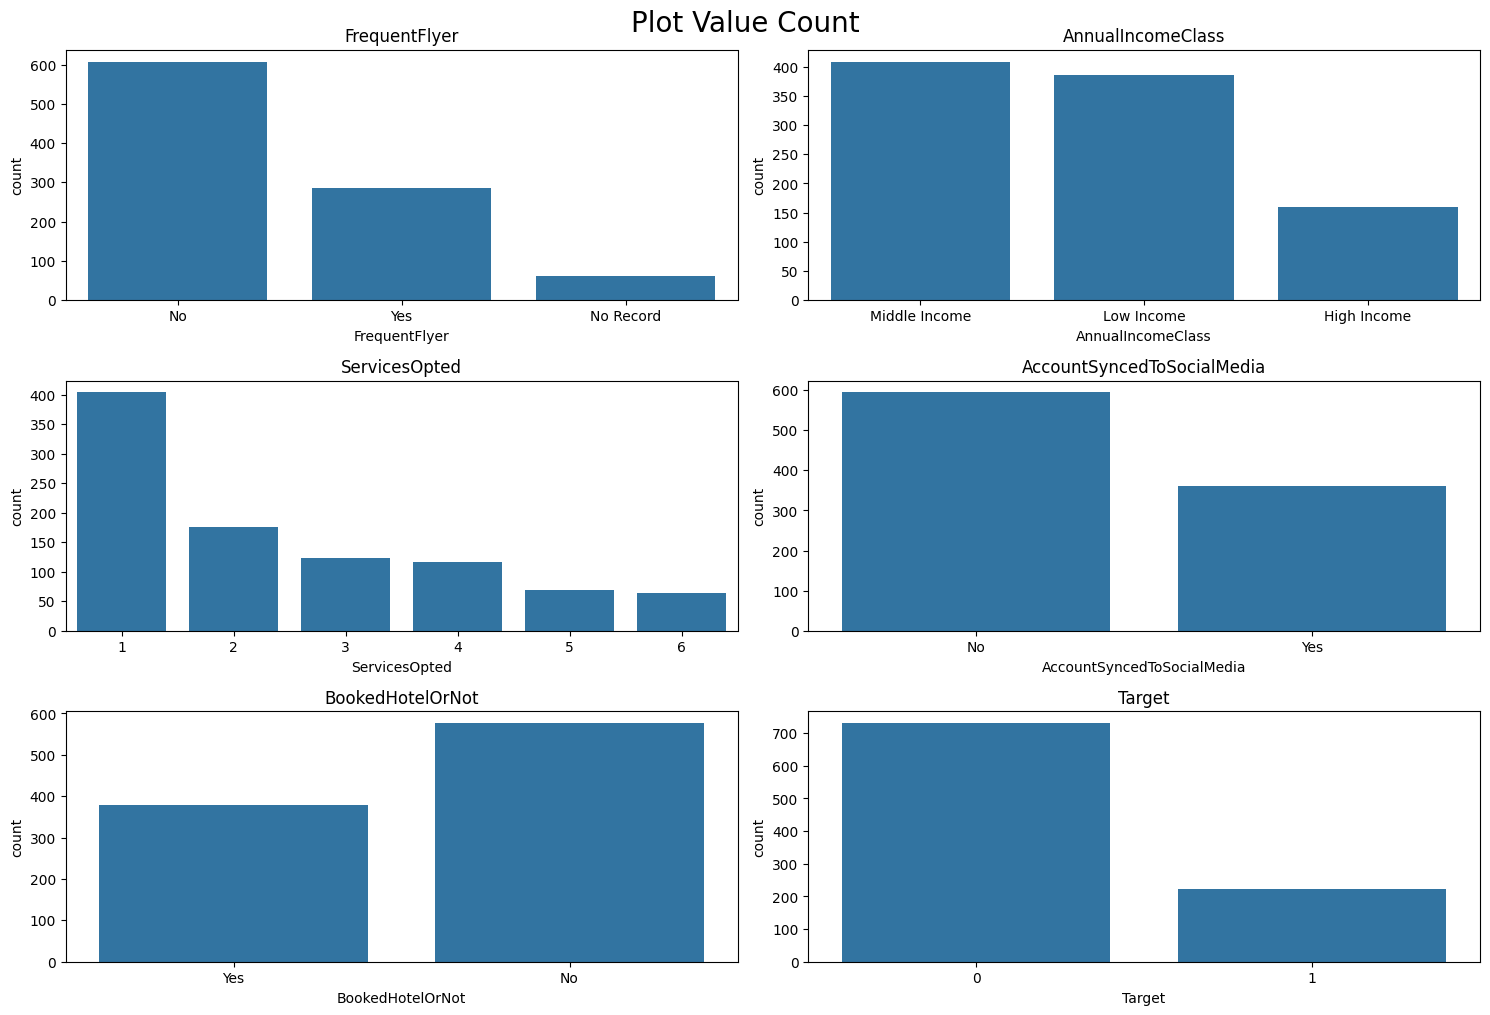

In [ ]:
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

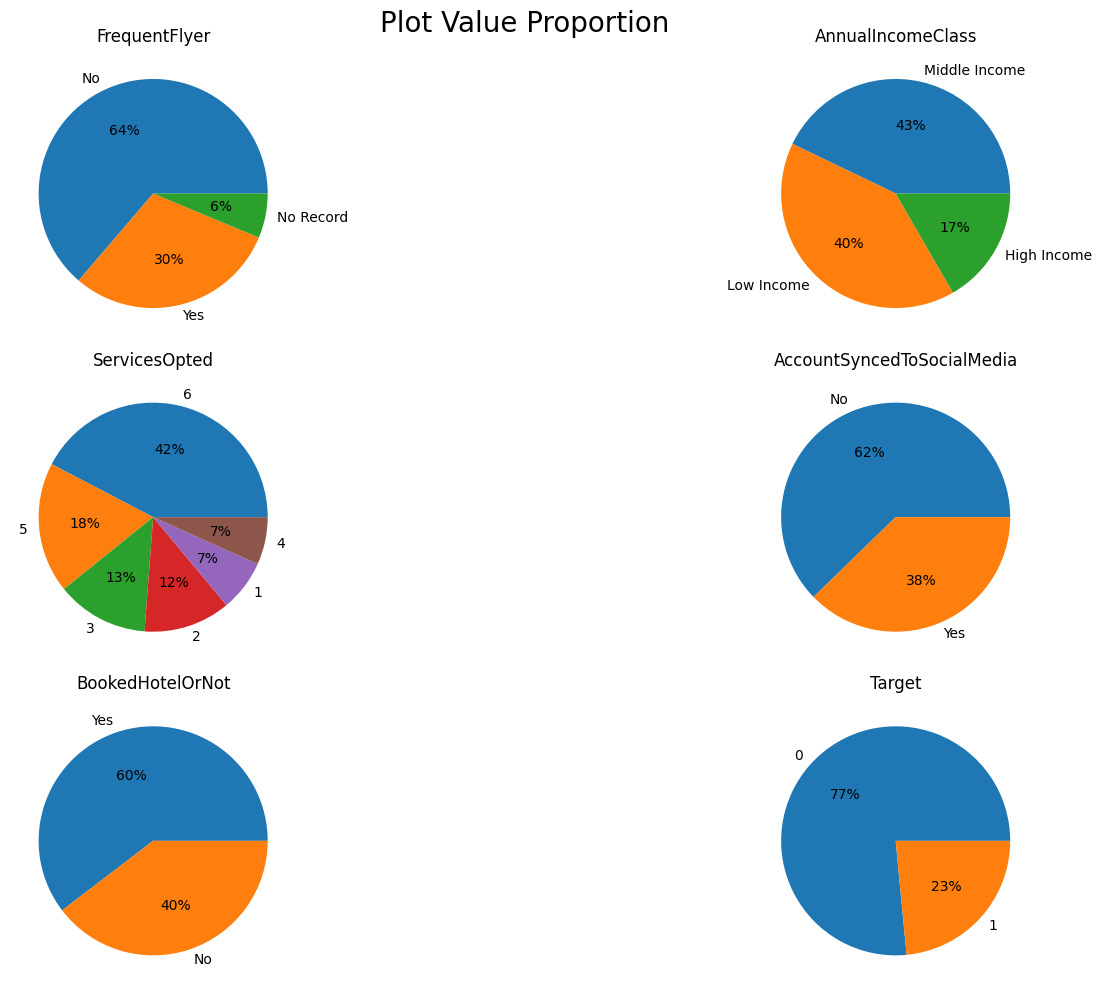

In [ ]:
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

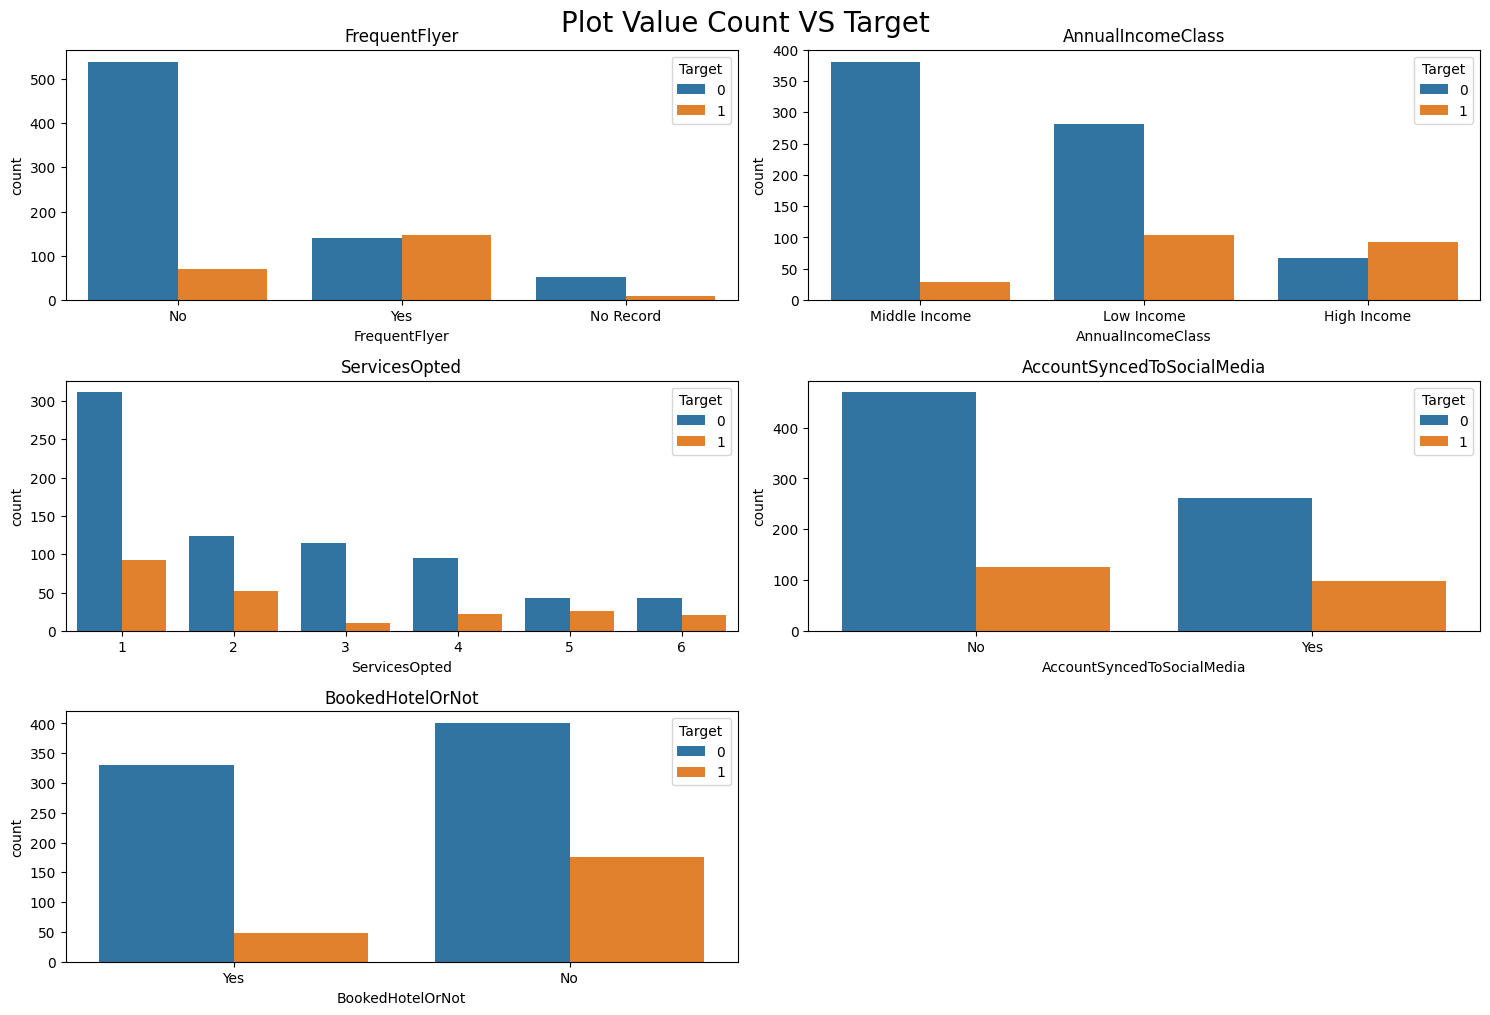

In [ ]:
for i,column in enumerate(catcol[:-1]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Target", fontsize=20)
    sns.countplot(data=df, x=column, hue='Target')
    plt.title(f"{column}")
    plt.tight_layout()

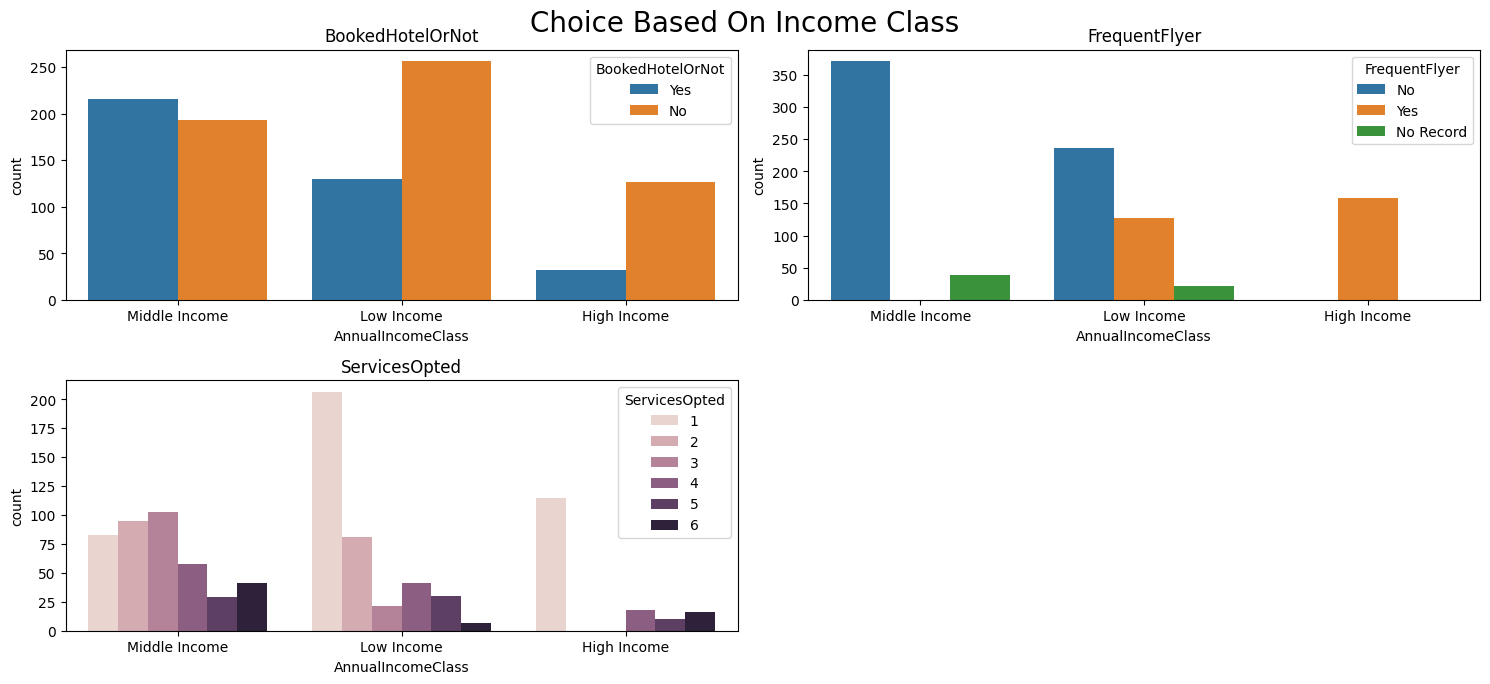

In [ ]:
for i,column in enumerate(['BookedHotelOrNot','FrequentFlyer','ServicesOpted']):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Choice Based On Income Class", fontsize=20)
    sns.countplot(data=df, x='AnnualIncomeClass', hue=column)
    plt.title(f"{column}")
    plt.tight_layout()

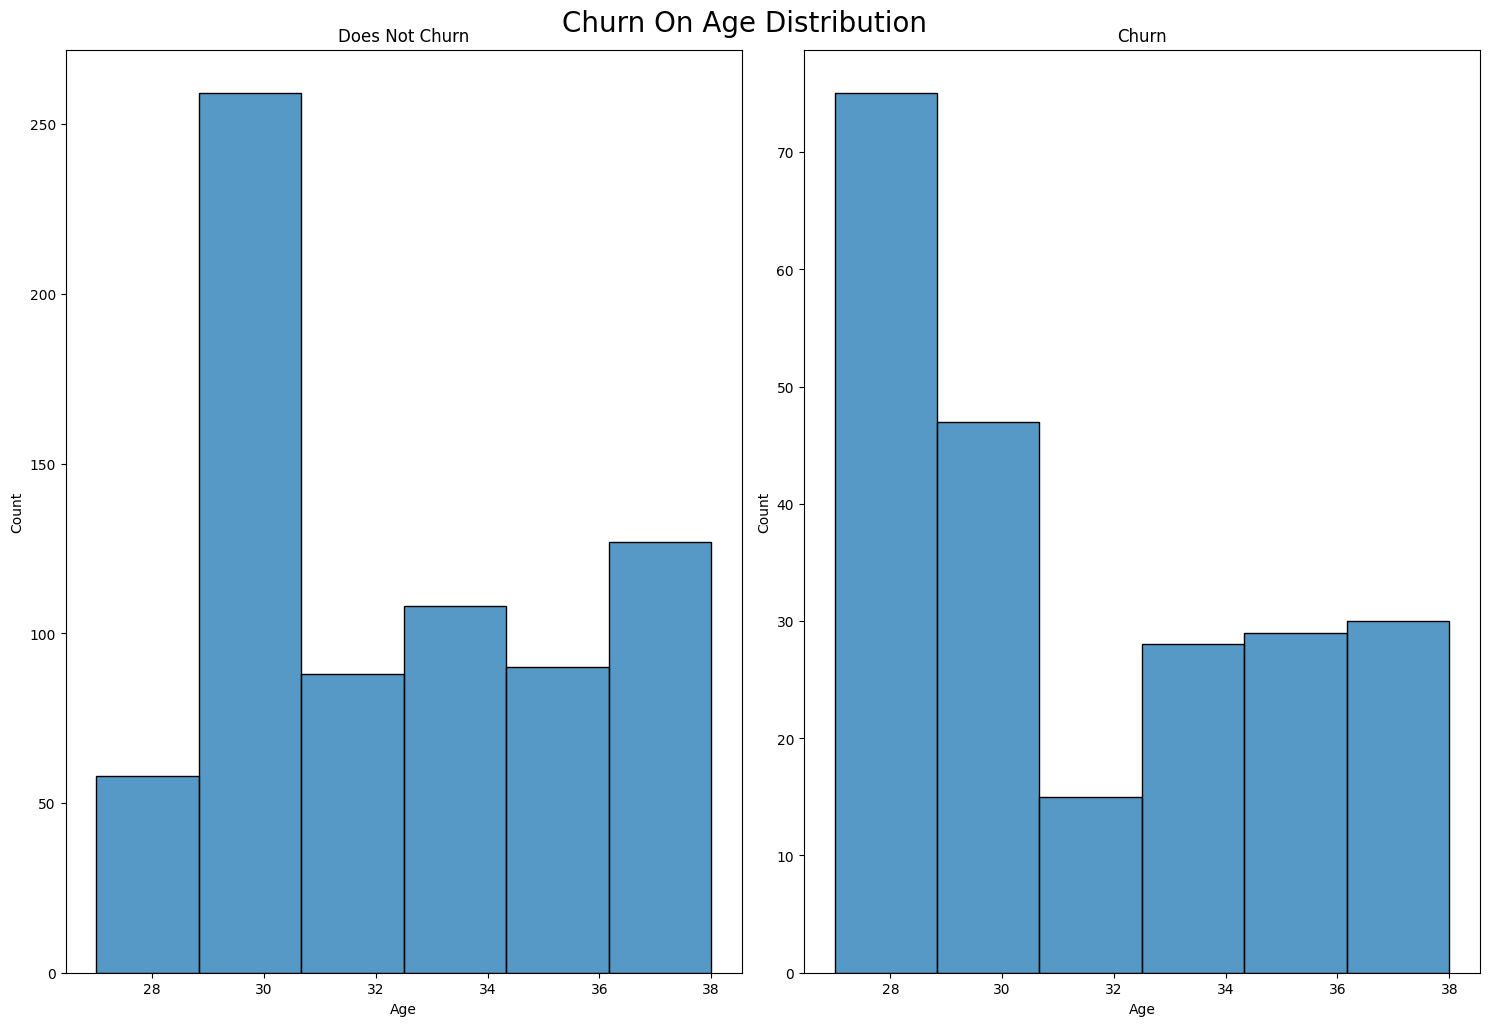

In [ ]:
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.suptitle("Churn On Age Distribution", fontsize=20)
    sns.histplot(data=df[df.Target==i], x='Age', bins=6)
    plt.title(f"{'Churn' if i==1 else 'Does Not Churn'}")
    plt.tight_layout()

Conclussion
- Customer with High Income do churn more than don't churn
- despite getting frequent flyers, more customers do churn than those who don't
- Customer with Middle Income are loyal customers
- ...

<h1 style='background:#CCE2CB; border:0; color:black'><center> Feature Engineering </center></h1>

In [ ]:
# Create New Column OHE for column with 3 uniques value
df = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass'], drop_first=True)
# Drop_first because there are 3 uniques value, whereas 2 of them is enough, so we drop 1

In [ ]:
# Transform column with 2 uniques value to OHE with LabelEncoder
for feature in ['AccountSyncedToSocialMedia','BookedHotelOrNot']:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [ ]:
df.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,False,False,False,True
1,34,5,1,0,1,False,True,True,False
2,37,3,1,0,0,False,False,False,True
3,30,2,0,0,0,False,False,False,True
4,30,1,0,0,0,False,False,True,False


<h1 style='background:#CCE2CB; border:0; color:black'><center> Preprocessing </center></h1>

In [ ]:
# Split column to Feature(X) and Target(Y)
X = df.drop(columns='Target')
Y = df['Target']

In [ ]:
X

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,False,False,False,True
1,34,5,1,0,False,True,True,False
2,37,3,1,0,False,False,False,True
3,30,2,0,0,False,False,False,True
4,30,1,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...
949,31,1,0,0,False,True,True,False
950,30,5,0,1,False,False,False,True
951,37,4,0,0,False,False,False,True
952,30,1,1,1,False,False,True,False


In [ ]:
Y

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int64

In [ ]:
# Split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

In [ ]:
# Because the Target is imbalance, i try to balance the data with SMOTE(OverSampling)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [ ]:
print(f"Before resample : \n{Y_train.value_counts()} \nAfter resample : \n{y_train_res.value_counts()}")

Before resample : 
Target
0    584
1    179
Name: count, dtype: int64 
After resample : 
Target
0    584
1    584
Name: count, dtype: int64


<h1 style='background:#CCE2CB; border:0; color:black'><center> Modelling </center></h1>

In [ ]:
# I will try some classifier algorithm and not tune the parameter, let it default
algorithm = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

In [ ]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)

print("=" * 30)

LogisticRegression
****Results****
Accuracy: 78.5340%
Log Loss: 7.737119313894258




AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("=" * 30)

LogisticRegression
****Results****
Accuracy: 78.5340%
Log Loss: 7.737119313894258


KNeighborsClassifier
****Results****
Accuracy: 85.3403%
Log Loss: 5.283886360708273


RandomForestClassifier
****Results****
Accuracy: 84.2932%
Log Loss: 5.661306815044579


XGBClassifier
****Results****
Accuracy: 86.3874%
Log Loss: 4.906465906371968


AdaBoostClassifier
****Results****
Accuracy: 83.2461%
Log Loss: 6.038727269380884


GradientBoostingClassifier
****Results****
Accuracy: 87.9581%
Log Loss: 4.34033522486751




In [ ]:
# Data with resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log_res = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(x_train_res, y_train_res)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')

    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")

    log_entry_res = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    #log_res = log_res.append(log_entry)
    log_res = pd.concat([log_res, log_entry_res], ignore_index=True)
print("=" * 30)

LogisticRegression
****Results****
Accuracy: 76.4398%
Log Loss: 8.491960222566867


KNeighborsClassifier
****Results****
Accuracy: 83.7696%
Log Loss: 5.850017042212732


RandomForestClassifier
****Results****
Accuracy: 82.1990%
Log Loss: 6.41614772371719


XGBClassifier
****Results****
Accuracy: 84.2932%
Log Loss: 5.661306815044578


AdaBoostClassifier
****Results****
Accuracy: 81.6754%
Log Loss: 6.604857950885343


GradientBoostingClassifier
****Results****
Accuracy: 84.8168%
Log Loss: 5.472596587876426




<h1 style='background:#CCE2CB; border:0; color:black'><center> Comparisson </center></h1>

In [ ]:
log.compare(log_res,align_axis=1).reset_index(drop=True).set_index(log['Classifier'])

Accuracy             Log Loss          
                                 self      other      self     other
Classifier                                                          
LogisticRegression          78.534031  76.439791  7.737119  8.491960
KNeighborsClassifier        85.340314  83.769634  5.283886  5.850017
RandomForestClassifier      84.293194  82.198953  5.661307  6.416148
XGBClassifier               86.387435  84.293194  4.906466  5.661307
AdaBoostClassifier          83.246073  81.675393  6.038727  6.604858
GradientBoostingClassifier  87.958115  84.816754  4.340335  5.472597

<Axes: xlabel='Classifier'>

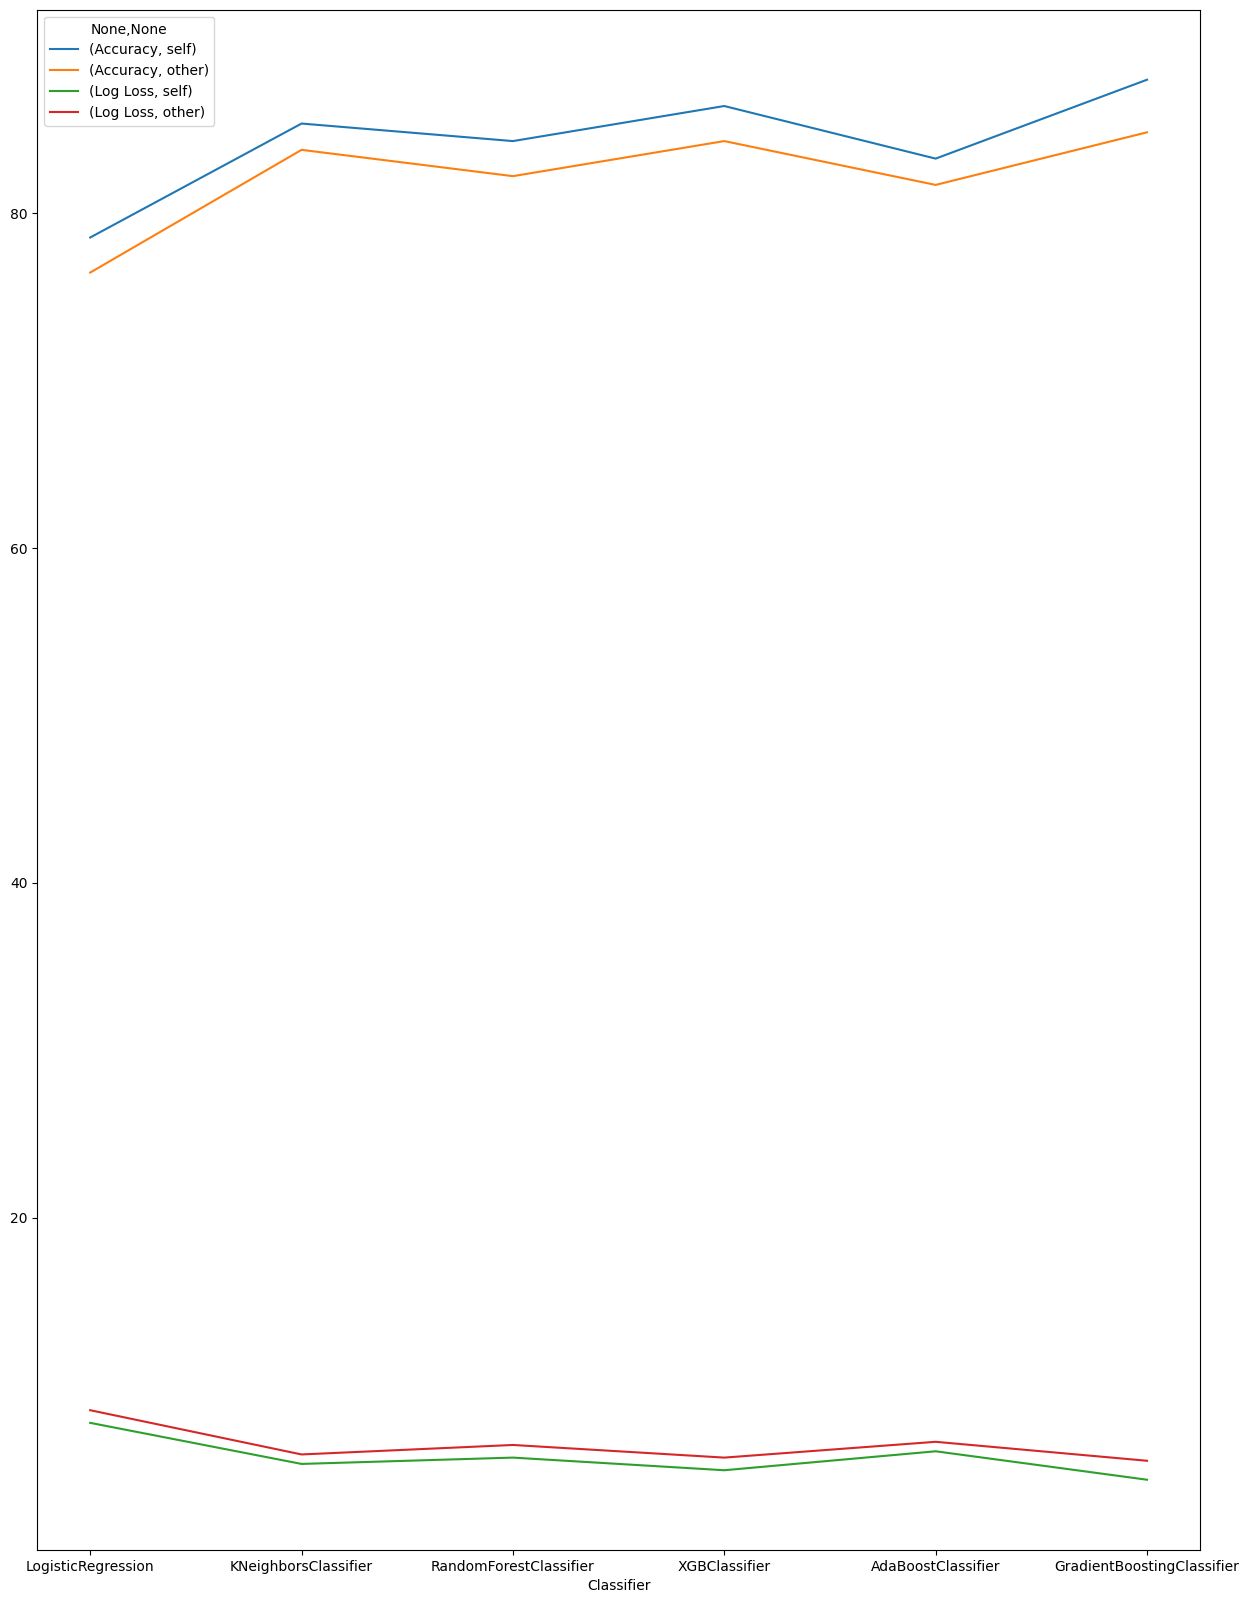

In [ ]:
log.compare(log_res,align_axis=1).reset_index(drop=True).set_index(log['Classifier']).plot()

In [ ]:
# Compare with only one model
# I choose GradientBoostingClassifier because gives the best accuracy results on both data
gbc = GradientBoostingClassifier()
gbc_Wres = gbc.fit(X_train, Y_train)
gbc_res = gbc.fit(x_train_res, y_train_res)

test_pred_Wres = gbc_Wres.predict(X_test)
test_pred_res = gbc_res.predict(X_test)

In [ ]:
CF_Wres = metrics.confusion_matrix(Y_test, test_pred_Wres)
CF_Wres

array([[124,  22],
       [  7,  38]])

In [ ]:
CF_res = metrics.confusion_matrix(Y_test, test_pred_res)
CF_res

array([[124,  22],
       [  7,  38]])

In [ ]:
CR_Wres = metrics.classification_report(Y_test, test_pred_Wres)
print(CR_Wres)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       146
           1       0.63      0.84      0.72        45

    accuracy                           0.85       191
   macro avg       0.79      0.85      0.81       191
weighted avg       0.87      0.85      0.85       191



In [ ]:
CR_res = metrics.classification_report(Y_test, test_pred_res)
print(CR_res)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       146
           1       0.63      0.84      0.72        45

    accuracy                           0.85       191
   macro avg       0.79      0.85      0.81       191
weighted avg       0.87      0.85      0.85       191

